# <font color=red> Clustering - Unsupervised Learning

Unsupervised Learning - > Hedef (y) yok.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("cars.xls")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
from sklearn.cluster import KMeans #en yakın komşular
from sklearn.metrics import silhouette_score  #elbow method

In [5]:
x = df[["Price","Mileage","Cylinder"]]

In [6]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [7]:
model = KMeans(n_clusters=4)

In [8]:
model = model.fit(x)

In [9]:
prediction = model.predict(x)

In [10]:
prediction

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2,
       2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

In [11]:
x["cluster"]= prediction

In [12]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,2


In [13]:
x.sample(10)

,Price,Mileage,Cylinder,cluster
255,12507.485267,19715,4,2
50,21908.366625,17353,6,0
96,30392.750158,18449,6,1
298,12706.911348,27521,4,2
534,16792.679529,12071,6,0
680,32197.340466,3867,4,3
336,13830.249025,17594,4,2
454,17685.200995,15898,6,0
578,16041.685586,27800,6,2
108,36154.303548,25339,8,1


In [14]:
silhouette_score(x,prediction)

0.4145589027839889

In [15]:
import matplotlib.pyplot as plt

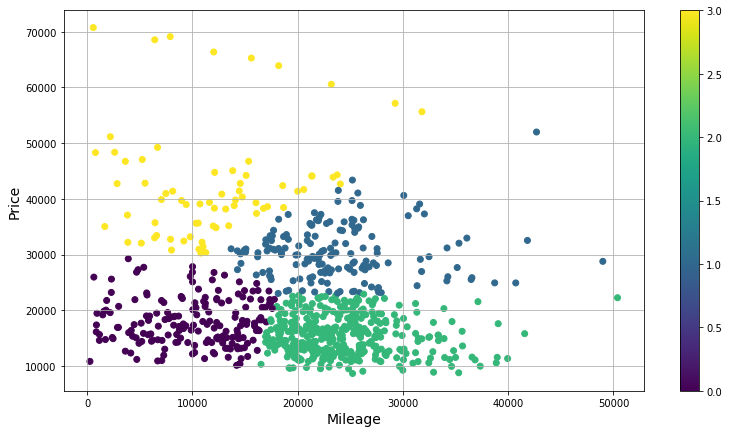

In [16]:
plt.figure(figsize = (13,7))
plt.scatter(x.Mileage,x.Price,c=prediction)
plt.xlabel("Mileage",fontsize=14)
plt.ylabel("Price",fontsize=14);
plt.colorbar()
plt.grid()

In [17]:
all_scores = []
all_clusters = []
dists = []
def cluster(n):
    for i in range(1,n+1):
        i = i+1
        model = KMeans(n_clusters=i)
        model = model.fit(x)
        prediction = model.predict(x)
        score = silhouette_score(x,prediction)
        dist = model.inertia_
        print(i," -> score",score)
        all_scores.append(score)
        all_clusters.append(i)
        dists.append(dist)
        
cluster(10)

2  -> score 0.45170118847864404
3  -> score 0.4132108682295255
4  -> score 0.41328609843173525
5  -> score 0.3545069900134809
6  -> score 0.3727236627109425
7  -> score 0.36142084838543287
8  -> score 0.361822876785547
9  -> score 0.3644876548237317
10  -> score 0.3548923870937565
11  -> score 0.35878238312971567


#### Değişmeyi bıraktığı yerde durmamız gerekiyor.

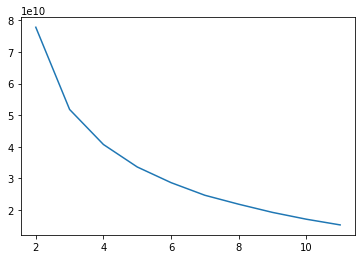

In [18]:
plt.plot(all_clusters,dists);

#### Grafik nerde kırılırsa o kadar gruba ayırmamız doğru olur. (Bu örnekte 3)

#### elbow metodunun gösterdiği üzere veriyi 4 farklı kümede toplamak en ideal olandır.